In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In telecom company, Churn rate is very important. Maintaing customer is a lot cheaper than acquiring new customers. Therefore predicting customer that will churn is very important, so that the company can focus on those customers that are more likely to churn.

In [110]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## Data Manipulation

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [112]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [113]:
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [114]:
df['Churn'].value_counts(normalize=True)

No     0.733063
Yes    0.266937
Name: Churn, dtype: float64

We have imbalance data

## Data Split and Preprocessing

In [115]:
#convert target variable churn into binary number
df['Churn']=np.where(df.Churn == 'Yes',1,0)

#encode the rest of data using dummies
df_dummies = pd.get_dummies(df)
df_dummies

,tenure,MonthlyCharges,Churn,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,9,72.90,1,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,14,82.65,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,64,47.85,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
3,72,69.65,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,3,23.60,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,15,103.45,0,1,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4926,10,91.10,0,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4927,58,20.75,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
4928,1,69.75,1,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [116]:
#scale numeric value
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges']

scaler = StandardScaler()
df_dummies[num_cols] = scaler.fit_transform(df_dummies[num_cols])
df_dummies

,tenure,MonthlyCharges,Churn,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,-0.955202,0.267938,1,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,-0.751110,0.593797,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,1.289814,-0.569268,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
3,1.616362,0.159319,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,-1.200113,-1.379738,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.710291,1.288963,0,1,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4926,-0.914384,0.876208,0,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4927,1.044903,-1.474989,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
4928,-1.281750,0.162661,1,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

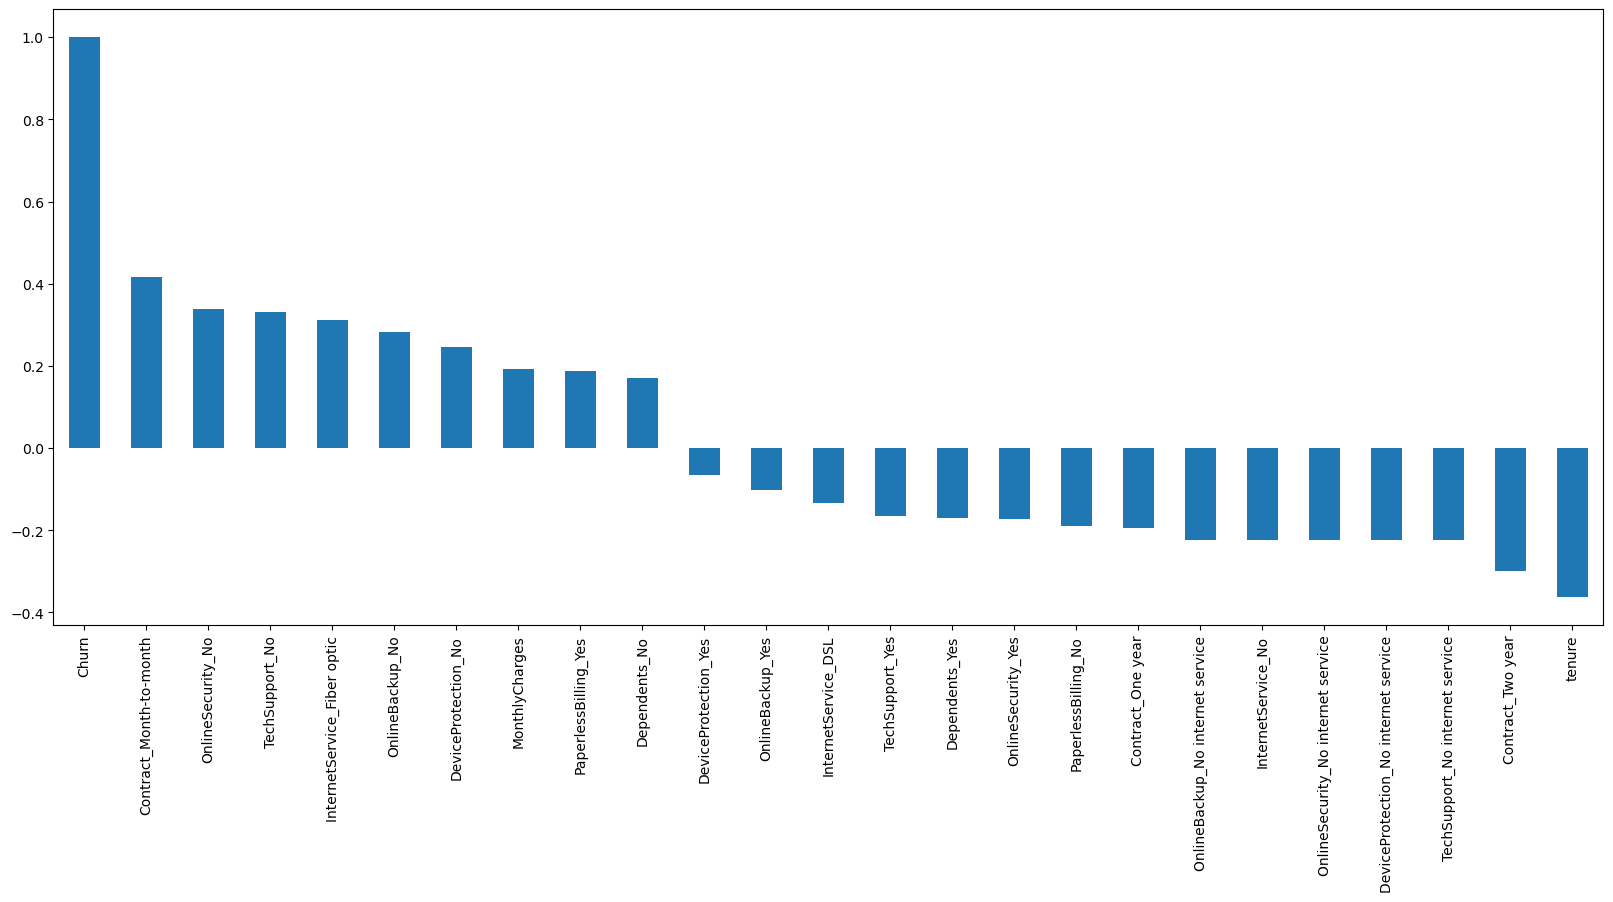

In [117]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [118]:
#60 training, 20 Validation, 20 Test
from sklearn.model_selection import train_test_split
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size = 986, 
    random_state = 101)

In [119]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    stratify = y_train_val,
    test_size = 986,
    random_state = 101)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")


## Modelling (Default Parameter)

for Churn rate, the evaluation metrics is Recall, since we want to predict the customer that will churn the most.
Therefore the model will be selected based on recall performance 

In [121]:
#==================Logistic Regression===============================
model_logreg = LogisticRegression(random_state=101)


model_names =[]

model_logreg.fit (X_train, y_train)
y_pred_logreg = model_logreg.predict(X_val)

recall =[recall_score(y_val, y_pred_logreg)]
roc_auc= [roc_auc_score(y_val, y_pred_logreg)]
f1 = [f1_score(y_val, y_pred_logreg)]

model_names = ['LogReg_default']
result_logreg = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

#==================KNeighborsClassifier===============================
model_knn = KNeighborsClassifier()
model_knn.fit (X_train, y_train)
y_pred_knn = model_knn.predict(X_val)

recall =[recall_score(y_val, y_pred_knn)]
roc_auc= [roc_auc_score(y_val, y_pred_knn)]
f1 = [f1_score(y_val, y_pred_knn)]

model_names = ['KNN_default']
result_knn = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================DecisionTreeClassifier===============================
model_dt = DecisionTreeClassifier(random_state=101)
model_dt.fit (X_train, y_train)
y_pred_dt = model_dt.predict(X_val)

recall =[recall_score(y_val, y_pred_dt)]
roc_auc= [roc_auc_score(y_val, y_pred_dt)]
f1 = [f1_score(y_val, y_pred_dt)]

model_names = ['DecisionTree_default']
result_dt = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================RandomForestClassifier===============================
model_rf = RandomForestClassifier(random_state=101)
model_rf.fit (X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

recall =[recall_score(y_val, y_pred_rf)]
roc_auc= [roc_auc_score(y_val, y_pred_rf)]
f1 = [f1_score(y_val, y_pred_rf)]

model_names = ['RandomForest_default']
result_rf = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================XGBClassifier===============================
model_xgb = XGBClassifier(random_state=101)
model_xgb.fit (X_train, y_train)
y_pred_xgb = model_xgb.predict(X_val)

recall =[recall_score(y_val, y_pred_xgb)]
roc_auc= [roc_auc_score(y_val, y_pred_xgb)]
f1 = [f1_score(y_val, y_pred_xgb)]

model_names = ['XGB_default']
result_xgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================LGBClassifier===============================
model_lgb = LGBMClassifier(random_state=101)
model_lgb.fit (X_train, y_train)
y_pred_lgb = model_lgb.predict(X_val)

recall =[recall_score(y_val, y_pred_lgb)]
roc_auc= [roc_auc_score(y_val, y_pred_lgb)]
f1 = [f1_score(y_val, y_pred_lgb)]

model_names = ['LGB_default']
result_lgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================CatBoostlassifier===============================
model_cat = CatBoostClassifier(verbose=False,random_state = 101)
model_cat.fit (X_train, y_train)
y_pred_cat = model_cat.predict(X_val)

recall =[recall_score(y_val, y_pred_cat)]
roc_auc= [roc_auc_score(y_val, y_pred_cat)]
f1 = [f1_score(y_val, y_pred_cat)]

model_names = ['Cat_default']
result_cat = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

result_final_default = pd.concat([result_logreg,result_knn, result_dt, result_rf, result_xgb, result_lgb, result_cat])
print(result_final_default)


                        Recall   Roc_Auc  F1-Score
LogReg_default        0.577947  0.718434  0.588008
KNN_default           0.505703  0.677471  0.526733
DecisionTree_default  0.444867  0.617316  0.439850
RandomForest_default  0.486692  0.674881  0.522449
XGB_default           0.543726  0.704090  0.567460
LGB_default           0.543726  0.706856  0.572000
Cat_default           0.539924  0.712562  0.581967


## Hyperparameter Tuning (GridSearchCV)

In [122]:

# KNN Hyperparameter Tuning

knn_param_grid = {'n_neighbors': [10,20,30,40]}
gridsearch_knn = GridSearchCV(estimator=model_knn, param_grid= knn_param_grid, n_jobs = -1)
gridsearch_knn.fit(X_train_val, y_train_val)
gridsearch_knn.best_params_

{'n_neighbors': 30}

In [123]:
knn_param_grid = {'n_neighbors': [10,20,30,40]}
gridsearch_knn = GridSearchCV(estimator=model_knn, param_grid= knn_param_grid, n_jobs = -1)
gridsearch_knn.fit(X_train_val, y_train_val)
gridsearch_knn.best_params_

{'n_neighbors': 30}

In [124]:
# rf_param_grid = {
#     'bootstrap': [True],
#     'max_depth': [30, 50, 70],
#     'min_samples_leaf': [7, 11, 15, 19],
#     'n_estimators': [150, 200, 250]
# }
# gridsearch_rf = GridSearchCV(estimator=model_rf, param_grid= rf_param_grid, n_jobs = -1)
# gridsearch_rf.fit(X_train_val, y_train_val)
# gridsearch_rf.best_params_

In [125]:
dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [3, 7, 11, 15, 19],
}
gridsearch_dt = GridSearchCV(estimator=model_dt, param_grid= dt_param_grid, n_jobs = -1)
gridsearch_dt.fit(X_train_val, y_train_val)
gridsearch_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 15}

In [126]:
#==================Logistic Regression===============================
model_logreg = LogisticRegression(random_state=101)


model_names =[]

model_logreg.fit (X_train, y_train)
y_pred_logreg = model_logreg.predict(X_val)

recall =[recall_score(y_val, y_pred_logreg)]
roc_auc= [roc_auc_score(y_val, y_pred_logreg)]
f1 = [f1_score(y_val, y_pred_logreg)]

model_names = ['LogReg_default']
result_logreg = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

#==================KNeighborsClassifier===============================
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit (X_train, y_train)
y_pred_knn = model_knn.predict(X_val)

recall =[recall_score(y_val, y_pred_knn)]
roc_auc= [roc_auc_score(y_val, y_pred_knn)]
f1 = [f1_score(y_val, y_pred_knn)]

model_names = ['KNN_best_params']
result_knn = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================DecisionTreeClassifier===============================
model_dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 15, random_state=101)
model_dt.fit (X_train, y_train)
y_pred_dt = model_dt.predict(X_val)

recall =[recall_score(y_val, y_pred_dt)]
roc_auc= [roc_auc_score(y_val, y_pred_dt)]
f1 = [f1_score(y_val, y_pred_dt)]

model_names = ['DecisionTree_best_params']
result_dt = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================RandomForestClassifier===============================
model_rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 15,n_estimators= 200, random_state=101)
model_rf.fit (X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

recall =[recall_score(y_val, y_pred_rf)]
roc_auc= [roc_auc_score(y_val, y_pred_rf)]
f1 = [f1_score(y_val, y_pred_rf)]

model_names = ['RandomForest_best_params']
result_rf = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================XGBClassifier===============================
model_xgb = XGBClassifier(random_state=101)
model_xgb.fit (X_train, y_train)
y_pred_xgb = model_xgb.predict(X_val)

recall =[recall_score(y_val, y_pred_xgb)]
roc_auc= [roc_auc_score(y_val, y_pred_xgb)]
f1 = [f1_score(y_val, y_pred_xgb)]

model_names = ['XGB_default']
result_xgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================LGBClassifier===============================
model_lgb = LGBMClassifier(random_state=101)
model_lgb.fit (X_train, y_train)
y_pred_lgb = model_lgb.predict(X_val)

recall =[recall_score(y_val, y_pred_lgb)]
roc_auc= [roc_auc_score(y_val, y_pred_lgb)]
f1 = [f1_score(y_val, y_pred_lgb)]

model_names = ['LGB_default']
result_lgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================CatBoostlassifier===============================
model_cat = CatBoostClassifier(verbose=False,random_state = 101)
model_cat.fit (X_train, y_train)
y_pred_cat = model_cat.predict(X_val)

recall =[recall_score(y_val, y_pred_cat)]
roc_auc= [roc_auc_score(y_val, y_pred_cat)]
f1 = [f1_score(y_val, y_pred_cat)]

model_names = ['Cat_default']
result_cat = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

result_final_default = pd.concat([result_logreg,result_knn, result_dt, result_rf, result_xgb, result_lgb, result_cat])
print(result_final_default)


                            Recall   Roc_Auc  F1-Score
LogReg_default            0.577947  0.718434  0.588008
KNN_best_params           0.513308  0.695105  0.554415
DecisionTree_best_params  0.528517  0.706859  0.573196
RandomForest_best_params  0.555133  0.726391  0.604555
XGB_default               0.543726  0.704090  0.567460
LGB_default               0.543726  0.706856  0.572000
Cat_default               0.539924  0.712562  0.581967


## Modelling (SMOTE)

In [127]:
smote = SMOTE(random_state=101)

# Applying SMOTE balance
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()


1    3614
0    3614
Name: Churn, dtype: int64

In [128]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X_smote, y_smote,test_size = 0.2)

In [130]:
#==================Logistic Regression===============================
model_logreg = LogisticRegression(random_state=101)


model_names =[]

model_logreg.fit (X_train_val, y_train_val)
y_pred_logreg = model_logreg.predict(X_test)

recall =[recall_score(y_test, y_pred_logreg)]
roc_auc= [roc_auc_score(y_test, y_pred_logreg)]
f1 = [f1_score(y_test, y_pred_logreg)]

model_names = ['LogReg_SMOTE']
result_logreg = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

#==================KNeighborsClassifier===============================
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit (X_train_val, y_train_val)
y_pred_knn = model_knn.predict(X_test)

recall =[recall_score(y_test, y_pred_knn)]
roc_auc= [roc_auc_score(y_test, y_pred_knn)]
f1 = [f1_score(y_test, y_pred_knn)]

model_names = ['KNN_best_params_SMOTE']
result_knn = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================DecisionTreeClassifier===============================
model_dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 15, random_state=101)
model_dt.fit (X_train_val, y_train_val)
y_pred_dt = model_dt.predict(X_test)

recall =[recall_score(y_test, y_pred_dt)]
roc_auc= [roc_auc_score(y_test, y_pred_dt)]
f1 = [f1_score(y_test, y_pred_dt)]

model_names = ['DecisionTree_best_params_SMOTE']
result_dt = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================RandomForestClassifier===============================
model_rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 15,n_estimators= 200, random_state=101)
model_rf.fit (X_train_val, y_train_val)
y_pred_rf = model_rf.predict(X_test)

recall =[recall_score(y_test, y_pred_rf)]
roc_auc= [roc_auc_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_rf)]

model_names = ['RandomForest_best_params_SMOTE']
result_rf = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================XGBClassifier===============================
model_xgb = XGBClassifier(random_state=101)
model_xgb.fit (X_train_val, y_train_val)
y_pred_xgb = model_xgb.predict(X_test)

recall =[recall_score(y_test, y_pred_xgb)]
roc_auc= [roc_auc_score(y_test, y_pred_xgb)]
f1 = [f1_score(y_test, y_pred_xgb)]

model_names = ['XGB_SMOTE']
result_xgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================LGBClassifier===============================
model_lgb = LGBMClassifier(random_state=101)
model_lgb.fit (X_train_val, y_train_val)
y_pred_lgb = model_lgb.predict(X_test)

recall =[recall_score(y_test, y_pred_lgb)]
roc_auc= [roc_auc_score(y_test, y_pred_lgb)]
f1 = [f1_score(y_test, y_pred_lgb)]

model_names = ['LGB_SMOTE']
result_lgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================CatBoostlassifier===============================
model_cat = CatBoostClassifier(verbose=False,random_state = 101)
model_cat.fit (X_train_val, y_train_val)
y_pred_cat = model_cat.predict(X_test)

recall =[recall_score(y_test, y_pred_cat)]
roc_auc= [roc_auc_score(y_test, y_pred_cat)]
f1 = [f1_score(y_test, y_pred_cat)]

model_names = ['Cat_SMOTE']
result_cat = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

result_final_SMOTE = pd.concat([result_logreg,result_knn, result_dt, result_rf, result_xgb, result_lgb, result_cat])
print(result_final_SMOTE)

                                  Recall   Roc_Auc  F1-Score
LogReg_SMOTE                    0.843923  0.806310  0.813582
KNN_best_params_SMOTE           0.874309  0.799343  0.813625
DecisionTree_best_params_SMOTE  0.830110  0.789016  0.797611
RandomForest_best_params_SMOTE  0.849448  0.801455  0.810811
XGB_SMOTE                       0.843923  0.837474  0.838710
LGB_SMOTE                       0.871547  0.840898  0.845845
Cat_SMOTE                       0.867403  0.842981  0.846932


## Modeling(class weight)

In [131]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y,test_size = 0.2)

In [133]:
#==================Logistic Regression===============================
model_logreg = LogisticRegression(class_weight= 'balanced',random_state=101)


model_names =[]

model_logreg.fit (X_train_val, y_train_val)
y_pred_logreg = model_logreg.predict(X_test)

recall =[recall_score(y_test, y_pred_logreg)]
roc_auc= [roc_auc_score(y_test, y_pred_logreg)]
f1 = [f1_score(y_test, y_pred_logreg)]

model_names = ['LogReg_weighted']
result_logreg = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================DecisionTreeClassifier===============================
model_dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 15,class_weight= 'balanced', random_state=101)
model_dt.fit (X_train_val, y_train_val)
y_pred_dt = model_dt.predict(X_test)

recall =[recall_score(y_test, y_pred_dt)]
roc_auc= [roc_auc_score(y_test, y_pred_dt)]
f1 = [f1_score(y_test, y_pred_dt)]

model_names = ['DecisionTree_best_params_weighted']
result_dt = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================RandomForestClassifier===============================
model_rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 15,n_estimators= 200, class_weight= 'balanced', random_state=101)
model_rf.fit (X_train_val, y_train_val)
y_pred_rf = model_rf.predict(X_test)

recall =[recall_score(y_test, y_pred_rf)]
roc_auc= [roc_auc_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_rf)]

model_names = ['RandomForest_best_params_wighted']
result_rf = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================XGBClassifier===============================
model_xgb = XGBClassifier(scale_pos_weight=5, random_state=101)
model_xgb.fit (X_train_val, y_train_val)
y_pred_xgb = model_xgb.predict(X_test)

recall =[recall_score(y_test, y_pred_xgb)]
roc_auc= [roc_auc_score(y_test, y_pred_xgb)]
f1 = [f1_score(y_test, y_pred_xgb)]

model_names = ['XGB_weighted']
result_xgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================LGBClassifier===============================
model_lgb = LGBMClassifier(scale_pos_weight=5,random_state=101)
model_lgb.fit (X_train_val, y_train_val)
y_pred_lgb = model_lgb.predict(X_test)

recall =[recall_score(y_test, y_pred_lgb)]
roc_auc= [roc_auc_score(y_test, y_pred_lgb)]
f1 = [f1_score(y_test, y_pred_lgb)]

model_names = ['LGB_weighted']
result_lgb = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)


#==================CatBoostlassifier===============================
model_cat = CatBoostClassifier(verbose=False, scale_pos_weight=5, random_state = 101)
model_cat.fit (X_train_val, y_train_val)
y_pred_cat = model_cat.predict(X_test)

recall =[recall_score(y_test, y_pred_cat)]
roc_auc= [roc_auc_score(y_test, y_pred_cat)]
f1 = [f1_score(y_test, y_pred_cat)]

model_names = ['Cat_weighted']
result_cat = pd.DataFrame({'Recall':recall, 'Roc_Auc':roc_auc, 'F1-Score':f1}, index=model_names)

result_final_weighted = pd.concat([result_logreg, result_dt, result_rf, result_xgb, result_lgb, result_cat])
print(result_final_weighted)

                                     Recall   Roc_Auc  F1-Score
LogReg_weighted                    0.817121  0.770700  0.628743
DecisionTree_best_params_weighted  0.805447  0.762806  0.619760
RandomForest_best_params_wighted   0.797665  0.769203  0.629800
XGB_weighted                       0.747082  0.749398  0.609524
LGB_weighted                       0.840467  0.770028  0.624277
Cat_weighted                       0.863813  0.773470  0.625352


## summary

In [140]:
result_final = pd.concat([result_final_default, result_final_weighted, result_final_SMOTE])
result_final['Recall'].sort_values(ascending= False)

KNN_best_params_SMOTE                0.874309
LGB_SMOTE                            0.871547
Cat_SMOTE                            0.867403
Cat_weighted                         0.863813
RandomForest_best_params_SMOTE       0.849448
XGB_SMOTE                            0.843923
LogReg_SMOTE                         0.843923
LGB_weighted                         0.840467
DecisionTree_best_params_SMOTE       0.830110
LogReg_weighted                      0.817121
DecisionTree_best_params_weighted    0.805447
RandomForest_best_params_wighted     0.797665
XGB_weighted                         0.747082
LogReg_default                       0.577947
RandomForest_best_params             0.555133
LGB_default                          0.543726
XGB_default                          0.543726
Cat_default                          0.539924
DecisionTree_best_params             0.528517
KNN_best_params                      0.513308
Name: Recall, dtype: float64

From the conslusion above we can conclude that the best three model for Churn prediction are KNN, Light Gradient Boosting, and Cat Boost with all using SMOTE oversampling preprocessing. 